<a href="https://colab.research.google.com/github/kangdh9447/MLP/blob/main/HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

과제) MNIST 데이터에 대한 분류 모델을 구축하라.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_file/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_file/test.csv')

In [3]:
X = train_data.iloc[:, 1:].values
y = train_data.iloc[:, 0].values

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [4]:
x_test = test_data

In [5]:
print(x_train.shape,
      x_val.shape,
      y_train.shape,
      y_val.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


1. Image 샘플 시각화

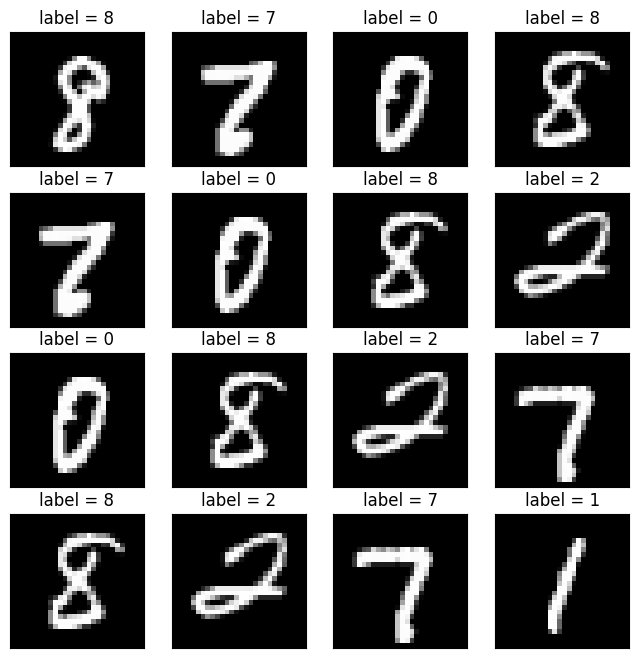

In [6]:
fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(x_train[i * 4 + j * 4].reshape(28, 28), cmap='gray')
        ax[i, j].set_title('label = %s'% (y_train[i * 4 + j * 4]))
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

2. Scikit-learn을 이용해서 모델을 학습

In [8]:
clf = LogisticRegression(C = 1.0, class_weight=None, dual = False, fit_intercept=True,
                         intercept_scaling=1, l1_ratio=None, max_iter=100,
                         multi_class='multinomial', n_jobs=None, penalty='l2',
                         random_state=None, solver='lbfgs', tol=0.001, verbose=0, warm_start=False)

clf.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', tol=0.001)

3. 검증 데이터를 prediction하고 정확도를 평가

In [9]:
y_val_pred = clf.predict(x_val)
print("Model accuracy is %0.3f" % (accuracy_score(y_val, y_val_pred)))

Model accuracy is 0.916


In [10]:
print(y_val.shape)

(8400,)


4. 옳게 분류한 이미지를 format에 맞게 시각화

Correctly predicted images : 


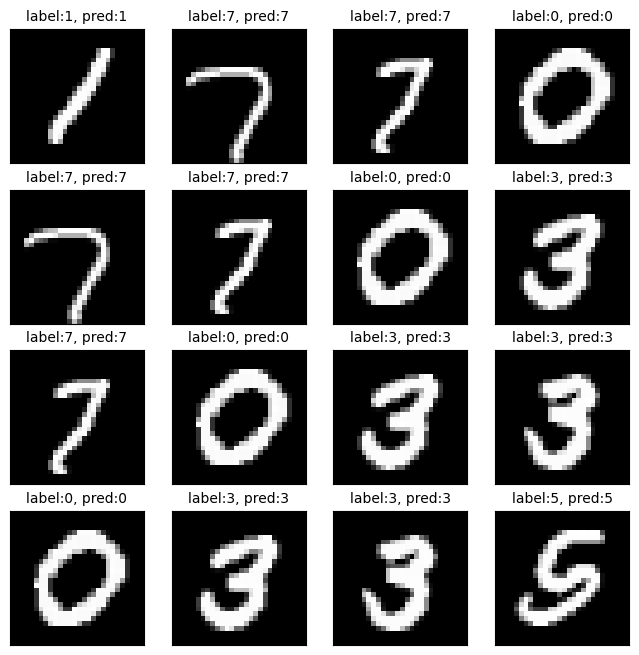

In [11]:
print("Correctly predicted images : ")
x_val_correct = x_val[y_val == y_val_pred, :]
y_val_correct = y_val[y_val == y_val_pred]
y_val_pred_correct = y_val_pred[y_val == y_val_pred]

fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(x_val_correct[i * 4 + j * 4].reshape(28, 28), cmap='gray')
        ax[i, j].set_title('label:%s, pred:%s'%(y_val_correct[i * 4 + j * 4], y_val_pred_correct[i * 4 + j * 4]), fontsize=10)
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

5. 잘못 분류한 이미지를 format에 맞게 시각화

Incorrectly predicted images : 


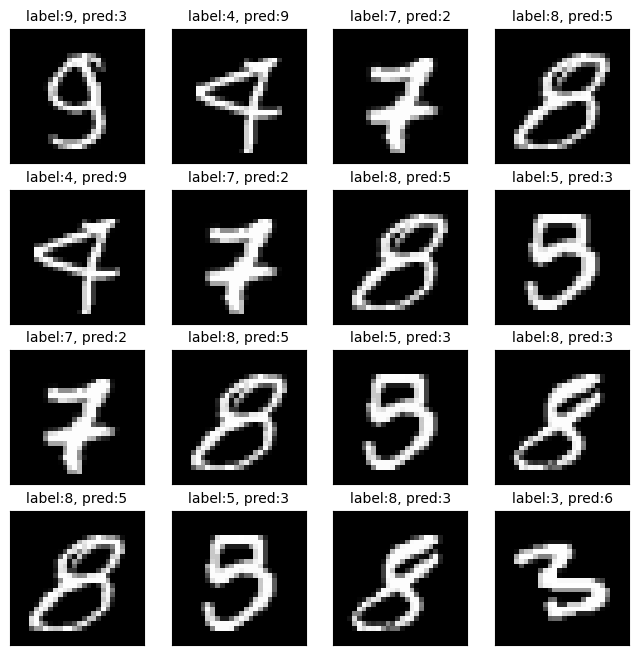

In [12]:
print("Incorrectly predicted images : ")
x_val_incorrect = x_val[y_val != y_val_pred, :]
y_val_incorrect = y_val[y_val != y_val_pred]
y_val_pred_incorrect = y_val_pred[y_val != y_val_pred]

fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(x_val_incorrect[i * 4 + j * 4].reshape(28, 28), cmap='gray')
        ax[i, j].set_title('label:%s, pred:%s'%(y_val_incorrect[i * 4 + j * 4], y_val_pred_incorrect[i * 4 + j * 4]), fontsize=10)
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

6. 테스트 데이터를 사용해서 예측하기

In [13]:
preds = clf.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


7. 예측 값을 파일(sample_submission.csv)로 보내기

In [16]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_file/sample_submission.csv')
sample_submission['Label'] = preds
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/data_file/sample_submission.csv', index = False)